In [8]:
import pandas as pd
import numpy as np

# Load the dataset
ob = pd.read_excel(
    r"C:\Users\Grove\OneDrive\Documents\PYTHON\Datasets\OB - Products - Dec 2018.xlsx",
    dtype=str
)

In [9]:
print(f"Number of records: {len(ob)}")
print("\nColumn names:")
print(ob.columns.tolist())
print("\nSample data:")
ob.head()

Number of records: 36458

Column names:
['Ingredient', 'DF;Route', 'Trade_Name', 'Applicant', 'Strength', 'Appl_Type', 'Appl_No', 'Product_No', 'TE_Code', 'Approval_Date', 'RLD', 'RS', 'Type', 'Applicant_Full_Name']

Sample data:


,Ingredient,DF;Route,Trade_Name,Applicant,Strength,Appl_Type,Appl_No,Product_No,TE_Code,Approval_Date,RLD,RS,Type,Applicant_Full_Name
0,BUDESONIDE,"AEROSOL, FOAM;RECTAL",UCERIS,VALEANT PHARMS INTL,2MG/ACTUATION,N,205613,1,NaN,2014-10-07 00:00:00,Yes,Yes,RX,VALEANT PHARMACEUTICALS INTERNATIONAL
1,BETAMETHASONE VALERATE,"AEROSOL, FOAM;TOPICAL",BETAMETHASONE VALERATE,PERRIGO UK FINCO,0.0012,A,78337,1,AB,2012-11-26 00:00:00,No,No,RX,PERRIGO UK FINCO LTD PARTNERSHIP
2,BETAMETHASONE VALERATE,"AEROSOL, FOAM;TOPICAL",BETAMETHASONE VALERATE,RICONPHARMA LLC,0.0012,A,207144,1,AB,2017-05-24 00:00:00,No,No,RX,RICONPHARMA LLC
3,BETAMETHASONE VALERATE,"AEROSOL, FOAM;TOPICAL",BETAMETHASONE VALERATE,TARO PHARM,0.0012,A,208204,1,AB,2017-05-24 00:00:00,No,No,RX,TARO PHARMACEUTICAL INDUSTRIES LTD
4,CLINDAMYCIN PHOSPHATE,"AEROSOL, FOAM;TOPICAL",CLINDAMYCIN PHOSPHATE,PERRIGO UK FINCO,0.01,A,90785,1,AT,2010-03-31 00:00:00,No,No,RX,PERRIGO UK FINCO LTD PARTNERSHIP


In [10]:
# Let's explore the OXYCODONE HYDROCHLORIDE example
# First, check if it exists in the dataset
oxycodone_data = ob[ob['Ingredient'].str.contains('OXYCODONE HYDROCHLORIDE', na=False)]
print(f"Number of OXYCODONE HYDROCHLORIDE records: {len(oxycodone_data)}")

# Check the unique dosage forms and routes for OXYCODONE HYDROCHLORIDE
print("\nUnique DF;Route combinations for OXYCODONE HYDROCHLORIDE:")
print(oxycodone_data['DF;Route'].unique())

# Check the unique strengths
print("\nUnique Strengths for OXYCODONE HYDROCHLORIDE:")
print(oxycodone_data['Strength'].unique())

# Check the unique application types
print("\nUnique Application Types for OXYCODONE HYDROCHLORIDE:")
print(oxycodone_data['Appl_Type'].unique())

# Create a subset specifically for OXYCODONE HYDROCHLORIDE TABLET;ORAL 10mg
oxycodone_subset = oxycodone_data[
    (oxycodone_data['DF;Route'] == 'TABLET;ORAL') & 
    (oxycodone_data['Strength'] == '10 mg')
]
print(f"\nNumber of OXYCODONE HYDROCHLORIDE TABLET;ORAL 10mg records: {len(oxycodone_subset)}")
print("\nApplication types in this subset:")
print(oxycodone_subset['Appl_Type'].value_counts())

oxycodone_subset

Number of OXYCODONE HYDROCHLORIDE records: 252

Unique DF;Route combinations for OXYCODONE HYDROCHLORIDE:
['CAPSULE, EXTENDED RELEASE;ORAL' 'CAPSULE;ORAL' 'SOLUTION;ORAL'
 'TABLET, EXTENDED RELEASE;ORAL' 'TABLET;ORAL']

Unique Strengths for OXYCODONE HYDROCHLORIDE:
['1.2MG;10MG' '2.4MG;20MG' '3.6MG;30MG' '4.8MG;40MG' '7.2MG;60MG'
 '9.6MG;80MG' '500MG;5MG' '5MG' '500MG;4.5MG;0.38MG' '325MG;5MG'
 '325MG/5ML;5MG/5ML' '300MG/5ML;10MG/5ML' '5MG/5ML' '100MG/5ML' '10MG'
 '15MG' '20MG' '30MG' '40MG' '60MG' '80MG' '5MG;10MG' '10MG;20MG'
 '20MG;40MG' '325MG;7.5MG' '325MG;4.5MG;0.38MG'
 '400MG;5MG **Federal Register determination that product was not discontinued or withdrawn for safety or efficacy reasons**'
 '7.5MG' '500MG;2.5MG' '325MG;2.5MG' '325MG;10MG' '500MG;7.5MG'
 '650MG;10MG' '300MG;2.5MG' '300MG;5MG' '300MG;7.5MG' '300MG;10MG'
 '400MG;2.5MG' '400MG;5MG' '400MG;7.5MG' '400MG;10MG' '500MG;10MG'
 '325MG;4.8355MG' '325MG;2.25MG;0.19MG'
 '325MG;4.5MG;0.38MG **Federal Register determination 

,Ingredient,DF;Route,Trade_Name,Applicant,Strength,Appl_Type,Appl_No,Product_No,TE_Code,Approval_Date,RLD,RS,Type,Applicant_Full_Name


In [32]:
import pandas as pd
import numpy as np

# Let's define a function to check if an ANDA has a corresponding NDA therapeutic equivalent
def check_therapeutic_equivalent(df, api, df_route, strength):
    """
    Check if there's a therapeutic equivalent (NDA - 'N') for a given ANDA drug
    with the same API, DF;Route, and Strength
    
    Parameters:
    -----------
    df : DataFrame
        The DataFrame containing the drug data
    api : str
        The API (Ingredient) to check
    df_route : str
        The DF;Route to check
    strength : str
        The Strength to check
        
    Returns:
    --------
    bool
        True if a therapeutic equivalent NDA exists, False otherwise
    """
    # Check if any 'N' type application exists with the same API, DF;Route and Strength
    nda_exists = len(df[
        (df['Ingredient'] == api) & 
        (df['DF;Route'] == df_route) & 
        (df['Strength'] == strength) & 
        (df['Appl_Type'] == 'N')
    ]) > 0
    
    return nda_exists

# Let's verify our test case with OXYCODONE HYDROCHLORIDE TABLET;ORAL 10mg
# We expect this to return False as per your example
api = 'OXYCODONE HYDROCHLORIDE'
df_route = 'TABLET;ORAL'
strength = '10MG'

has_therapeutic_equivalent = check_therapeutic_equivalent(ob, api, df_route, strength)
print(f"Does OXYCODONE HYDROCHLORIDE TABLET;ORAL 10mg have an NDA therapeutic equivalent? {has_therapeutic_equivalent}")

Does OXYCODONE HYDROCHLORIDE TABLET;ORAL 10mg have an NDA therapeutic equivalent? False


In [ ]:
# Now let's build the complete algorithm to find all ANDAs without therapeutic equivalents

def find_andas_without_therapeutic_equivalents(df):
    """
    Find all ANDAs that don't have therapeutic equivalents (NDAs)
    with the same API, DF;Route, and Strength
    
    Parameters:
    -----------
    df : DataFrame
        The DataFrame containing the drug data
        
    Returns:
    --------
    DataFrame
        A DataFrame containing all ANDA drugs without therapeutic equivalents
    """
    # Create a subset of the data for ANDA applications
    anda_subset = df[df['Appl_Type'] == 'A'].copy()
    
    # Filter out rows with missing values in any of the key columns
    anda_subset = anda_subset.dropna(subset=['Ingredient', 'DF;Route', 'Strength'])
    
    # Create a unique identifier for each drug combination 
    # to avoid checking the same combination multiple times
    anda_subset['drug_id'] = anda_subset['Ingredient'] + '|' + anda_subset['DF;Route'] + '|' + anda_subset['Strength']
    
    # Get unique drug combinations
    unique_drug_combinations = anda_subset['drug_id'].unique()
    
    # Initialize a list to store results
    andas_without_equivalents = []
    
    # Track combinations we've already checked
    checked_combinations = set()
    
    # Check each unique drug combination
    for drug_id in unique_drug_combinations:
        if drug_id in checked_combinations:
            continue
            
        # Add to checked combinations
        checked_combinations.add(drug_id)
        
        # Split the drug_id to get individual components
        api, df_route, strength = drug_id.split('|')
        
        # Check if a therapeutic equivalent exists
        has_equivalent = check_therapeutic_equivalent(df, api, df_route, strength)
        
        # If no therapeutic equivalent, add all ANDAs with this combination to the results
        if not has_equivalent:
            matching_andas = anda_subset[anda_subset['drug_id'] == drug_id]
            andas_without_equivalents.append(matching_andas)
    
    # Combine all results
    if andas_without_equivalents:
        result = pd.concat(andas_without_equivalents)
        return result.drop(columns=['drug_id'])
    else:
        # Return an empty DataFrame with the same columns if no results found
        return pd.DataFrame(columns=anda_subset.drop(columns=['drug_id']).columns)


test_subset = ob.copy() #Test subset does a copy of the full orangebook
andas_without_nda = find_andas_without_therapeutic_equivalents(test_subset)

# Print summary statistics
print(f"Total ANDA applications: {len(test_subset[test_subset['Appl_Type'] == 'A'])}")
print(f"ANDAs without therapeutic equivalents: {len(andas_without_nda)}")



Total ANDA applications: 26830
ANDAs without therapeutic equivalents: 9016

Our example found in results: False
Number of OXYCODONE HYDROCHLORIDE TABLET;ORAL 10mg ANDAs without therapeutic equivalents: 0

First few ANDAs without therapeutic equivalents:


,Ingredient,DF;Route,Trade_Name,Applicant,Strength,Appl_Type,Appl_No,Product_No,TE_Code,Approval_Date,RLD,RS,Type,Applicant_Full_Name
104,HYDROCORTISONE ACETATE; PRAMOXINE HYDROCHLORIDE,"AEROSOL, METERED;TOPICAL",EPIFOAM,MYLAN SPECIALITY LP,1%;1%,A,86457,1,BX,"Approved Prior to Jan 1, 1982",No,No,RX,MYLAN SPECIALTY LP
106,HYDROCORTISONE ACETATE; PRAMOXINE HYDROCHLORIDE,"AEROSOL, METERED;TOPICAL",HYDROCORTISONE ACETATE 1% AND PRAMOXINE HYDROC...,GENUS LIFESCIENCES,1%;1%,A,89440,1,NaN,1988-05-17 00:00:00,No,No,DISCN,GENUS LIFESCIENCES INC
107,HYDROCORTISONE ACETATE; PRAMOXINE HYDROCHLORIDE,"AEROSOL, METERED;TOPICAL",PROCTOFOAM HC,MYLAN SPECIALITY LP,1%;1%,A,86195,1,BX,"Approved Prior to Jan 1, 1982",No,No,RX,MYLAN SPECIALTY LP
112,DEXAMETHASONE,AEROSOL;TOPICAL,AEROSEB-DEX,ALLERGAN HERBERT,0.01% **Federal Register determination that pr...,A,83296,2,NaN,"Approved Prior to Jan 1, 1982",No,No,DISCN,ALLERGAN HERBERT DIV ALLERGAN INC
113,HYDROCORTISONE,AEROSOL;TOPICAL,AEROSEB-HC,ALLERGAN HERBERT,0.005,A,85805,1,NaN,"Approved Prior to Jan 1, 1982",No,No,DISCN,ALLERGAN HERBERT DIV ALLERGAN INC


In [42]:
# Check if our OXYCODONE HYDROCHLORIDE is in the results
oxycodone_example = andas_without_nda[
    (andas_without_nda['Ingredient'] == 'OXYCODONE HYDROCHLORIDE') & 
    (andas_without_nda['DF;Route'] == 'TABLET;ORAL') & 
    (andas_without_nda['Strength'] == '10MG') &
    (andas_without_nda["Type"] == "N")
]

print(f"\nOur example found in results: {len(oxycodone_example) > 0}")
print(f"Number of OXYCODONE HYDROCHLORIDE TABLET;ORAL 10mg ANDAs without therapeutic equivalents: {len(oxycodone_example)}")

# Show the first few results
print("\nFirst few ANDAs without therapeutic equivalents:")
andas_without_nda.head()


Our example found in results: False
Number of OXYCODONE HYDROCHLORIDE TABLET;ORAL 10mg ANDAs without therapeutic equivalents: 0

First few ANDAs without therapeutic equivalents:


,Ingredient,DF;Route,Trade_Name,Applicant,Strength,Appl_Type,Appl_No,Product_No,TE_Code,Approval_Date,RLD,RS,Type,Applicant_Full_Name
104,HYDROCORTISONE ACETATE; PRAMOXINE HYDROCHLORIDE,"AEROSOL, METERED;TOPICAL",EPIFOAM,MYLAN SPECIALITY LP,1%;1%,A,86457,1,BX,"Approved Prior to Jan 1, 1982",No,No,RX,MYLAN SPECIALTY LP
106,HYDROCORTISONE ACETATE; PRAMOXINE HYDROCHLORIDE,"AEROSOL, METERED;TOPICAL",HYDROCORTISONE ACETATE 1% AND PRAMOXINE HYDROC...,GENUS LIFESCIENCES,1%;1%,A,89440,1,NaN,1988-05-17 00:00:00,No,No,DISCN,GENUS LIFESCIENCES INC
107,HYDROCORTISONE ACETATE; PRAMOXINE HYDROCHLORIDE,"AEROSOL, METERED;TOPICAL",PROCTOFOAM HC,MYLAN SPECIALITY LP,1%;1%,A,86195,1,BX,"Approved Prior to Jan 1, 1982",No,No,RX,MYLAN SPECIALTY LP
112,DEXAMETHASONE,AEROSOL;TOPICAL,AEROSEB-DEX,ALLERGAN HERBERT,0.01% **Federal Register determination that pr...,A,83296,2,NaN,"Approved Prior to Jan 1, 1982",No,No,DISCN,ALLERGAN HERBERT DIV ALLERGAN INC
113,HYDROCORTISONE,AEROSOL;TOPICAL,AEROSEB-HC,ALLERGAN HERBERT,0.005,A,85805,1,NaN,"Approved Prior to Jan 1, 1982",No,No,DISCN,ALLERGAN HERBERT DIV ALLERGAN INC


In [15]:
andas_without_nda[andas_without_nda["Approval_Date"] != "Approved Prior to Jan 1, 1982"]

,Ingredient,DF;Route,Trade_Name,Applicant,Strength,Appl_Type,Appl_No,Product_No,TE_Code,Approval_Date,RLD,RS,Type,Applicant_Full_Name
106,HYDROCORTISONE ACETATE; PRAMOXINE HYDROCHLORIDE,"AEROSOL, METERED;TOPICAL",HYDROCORTISONE ACETATE 1% AND PRAMOXINE HYDROC...,GENUS LIFESCIENCES,1%;1%,A,89440,1,NaN,1988-05-17 00:00:00,No,No,DISCN,GENUS LIFESCIENCES INC
120,CHOLESTYRAMINE,"BAR, CHEWABLE;ORAL",CHOLYBAR,PARKE DAVIS,EQ 4GM RESIN/BAR,A,71621,1,NaN,1988-05-26 00:00:00,No,No,DISCN,PARKE DAVIS DIV WARNER LAMBERT CO
121,CHOLESTYRAMINE,"BAR, CHEWABLE;ORAL",CHOLYBAR,PARKE DAVIS,EQ 4GM RESIN/BAR,A,71739,1,NaN,1988-05-26 00:00:00,No,No,DISCN,PARKE DAVIS DIV WARNER LAMBERT CO
126,DOXYCYCLINE HYCLATE,"CAPSULE, COATED PELLETS;ORAL",DOXYCYCLINE HYCLATE,PLIVA,EQ 100MG BASE,A,63187,1,NaN,1992-06-30 00:00:00,No,No,DISCN,PLIVA INC
171,DULOXETINE HYDROCHLORIDE,"CAPSULE, DELAYED REL PELLETS;ORAL",DULOXETINE HYDROCHLORIDE,BRECKENRIDGE PHARM,EQ 40MG BASE,A,203088,4,AB,2018-05-18 00:00:00,No,No,RX,BRECKENRIDGE PHARMACEUTICAL INC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36402,NYSTATIN,TABLET;VAGINAL,NYSTATIN,PHARMADERM,"100,000 UNITS",A,62460,1,NaN,1983-11-09 00:00:00,No,No,DISCN,PHARMADERM DIV ALTANA INC
36403,NYSTATIN,TABLET;VAGINAL,NYSTATIN,QUANTUM PHARMICS,"100,000 UNITS",A,62509,1,NaN,1984-04-03 00:00:00,No,No,DISCN,QUANTUM PHARMICS LTD
36405,NYSTATIN,TABLET;VAGINAL,NYSTATIN,TEVA,"100,000 UNITS",A,62502,1,NaN,1983-12-23 00:00:00,No,No,DISCN,TEVA PHARMACEUTICALS USA INC
36417,CLOTRIMAZOLE,TROCHE/LOZENGE;ORAL,CLOTRIMAZOLE,PADDOCK LLC,10MG,A,76763,1,AB,2005-10-28 00:00:00,No,No,RX,PADDOCK LABORATORIES LLC


In [20]:
# Corrected query for NYSTATIN TABLET;VAGINAL with Strength 100,000 UNIT
ob.query('Ingredient == "NYSTATIN" and `DF;Route` == "TABLET;VAGINAL" and Strength == "100,000 UNITS"')

,Ingredient,DF;Route,Trade_Name,Applicant,Strength,Appl_Type,Appl_No,Product_No,TE_Code,Approval_Date,RLD,RS,Type,Applicant_Full_Name
36395,NYSTATIN,TABLET;VAGINAL,KOROSTATIN,HOLLAND RANTOS,"100,000 UNITS",A,61718,1,NaN,"Approved Prior to Jan 1, 1982",No,No,DISCN,HOLLAND RANTOS CO INC
36398,NYSTATIN,TABLET;VAGINAL,MYCOSTATIN,DELCOR ASSET CORP,"100,000 UNITS",A,60577,1,NaN,"Approved Prior to Jan 1, 1982",No,No,DISCN,DELCOR ASSET CORP
36399,NYSTATIN,TABLET;VAGINAL,NILSTAT,LEDERLE,"100,000 UNITS",A,61325,1,NaN,"Approved Prior to Jan 1, 1982",No,No,DISCN,LEDERLE LABORATORIES DIV AMERICAN CYANAMID CO
36400,NYSTATIN,TABLET;VAGINAL,NYSTATIN,FOUGERA,"100,000 UNITS",A,62459,1,NaN,1983-11-09 00:00:00,No,No,DISCN,E FOUGERA DIV ALTANA INC
36401,NYSTATIN,TABLET;VAGINAL,NYSTATIN,ODYSSEY PHARMS,"100,000 UNITS",A,62615,1,NaN,1985-10-17 00:00:00,No,No,DISCN,ODYSSEY PHARMACEUTICALS INC
36402,NYSTATIN,TABLET;VAGINAL,NYSTATIN,PHARMADERM,"100,000 UNITS",A,62460,1,NaN,1983-11-09 00:00:00,No,No,DISCN,PHARMADERM DIV ALTANA INC
36403,NYSTATIN,TABLET;VAGINAL,NYSTATIN,QUANTUM PHARMICS,"100,000 UNITS",A,62509,1,NaN,1984-04-03 00:00:00,No,No,DISCN,QUANTUM PHARMICS LTD
36404,NYSTATIN,TABLET;VAGINAL,NYSTATIN,SANDOZ,"100,000 UNITS",A,61965,1,NaN,"Approved Prior to Jan 1, 1982",No,No,DISCN,SANDOZ INC
36405,NYSTATIN,TABLET;VAGINAL,NYSTATIN,TEVA,"100,000 UNITS",A,62502,1,NaN,1983-12-23 00:00:00,No,No,DISCN,TEVA PHARMACEUTICALS USA INC
36406,NYSTATIN,TABLET;VAGINAL,NYSTATIN,WATSON LABS,"100,000 UNITS",A,62176,1,NaN,"Approved Prior to Jan 1, 1982",No,No,DISCN,WATSON LABORATORIES INC


In [21]:
# Filter andas_without_nda to show only unique therapeutic equivalent combinations
# This will give us one representative result for each unique combination of Ingredient + DF;Route + Strength

unique_therapeutic_equivalents = andas_without_nda.drop_duplicates(
    subset=['Ingredient', 'DF;Route', 'Strength'], 
    keep='first'  # Keep the first occurrence of each unique combination
)

print(f"Total ANDAs without NDAs: {len(andas_without_nda)}")
print(f"Unique therapeutic equivalent combinations without NDAs: {len(unique_therapeutic_equivalents)}")

# Let's verify with the NYSTATIN example
nystatin_example = unique_therapeutic_equivalents[
    (unique_therapeutic_equivalents['Ingredient'] == 'NYSTATIN') & 
    (unique_therapeutic_equivalents['DF;Route'] == 'TABLET;VAGINAL') & 
    (unique_therapeutic_equivalents['Strength'] == '100,000 UNITS')
]

print(f"\nNYSTATIN TABLET;VAGINAL 100,000 UNITS found in unique results: {len(nystatin_example) > 0}")

# Display the first few unique therapeutic equivalent combinations
print("\nFirst 10 unique therapeutic equivalent combinations without NDAs:")
unique_therapeutic_equivalents[['Ingredient', 'DF;Route', 'Strength', 'Trade_Name', 'Applicant']].head(10)

Total ANDAs without NDAs: 9016
Unique therapeutic equivalent combinations without NDAs: 1733

NYSTATIN TABLET;VAGINAL 100,000 UNITS found in unique results: True

First 10 unique therapeutic equivalent combinations without NDAs:


,Ingredient,DF;Route,Strength,Trade_Name,Applicant
104,HYDROCORTISONE ACETATE; PRAMOXINE HYDROCHLORIDE,"AEROSOL, METERED;TOPICAL",1%;1%,EPIFOAM,MYLAN SPECIALITY LP
112,DEXAMETHASONE,AEROSOL;TOPICAL,0.01% **Federal Register determination that pr...,AEROSEB-DEX,ALLERGAN HERBERT
113,HYDROCORTISONE,AEROSOL;TOPICAL,0.005,AEROSEB-HC,ALLERGAN HERBERT
120,CHOLESTYRAMINE,"BAR, CHEWABLE;ORAL",EQ 4GM RESIN/BAR,CHOLYBAR,PARKE DAVIS
126,DOXYCYCLINE HYCLATE,"CAPSULE, COATED PELLETS;ORAL",EQ 100MG BASE,DOXYCYCLINE HYCLATE,PLIVA
171,DULOXETINE HYDROCHLORIDE,"CAPSULE, DELAYED REL PELLETS;ORAL",EQ 40MG BASE,DULOXETINE HYDROCHLORIDE,BRECKENRIDGE PHARM
276,OMEPRAZOLE,"CAPSULE, DELAYED REL PELLETS;ORAL",10MG,OMEPRAZOLE,ACTAVIS LABS FL INC
277,OMEPRAZOLE,"CAPSULE, DELAYED REL PELLETS;ORAL",20MG,OMEPRAZOLE,ACTAVIS LABS FL INC
278,OMEPRAZOLE,"CAPSULE, DELAYED REL PELLETS;ORAL",40MG,OMEPRAZOLE,ACTAVIS LABS FL INC
363,OMEPRAZOLE MAGNESIUM,"CAPSULE, DELAYED RELEASE;ORAL",EQ 20MG BASE,OMEPRAZOLE MAGNESIUM,DR REDDYS LABS LTD


In [24]:
# Filter unique therapeutic equivalents to exclude those approved prior to Jan 1, 1982
unique_therapeutic_equivalents_post_1982 = unique_therapeutic_equivalents[
    unique_therapeutic_equivalents["Approval_Date"] != "Approved Prior to Jan 1, 1982"
]

print(f"Unique therapeutic equivalents (all): {len(unique_therapeutic_equivalents)}")
print(f"Unique therapeutic equivalents (approved after Jan 1, 1982): {len(unique_therapeutic_equivalents_post_1982)}")

# Display the filtered results
print(f"\nFiltered dataset contains {len(unique_therapeutic_equivalents_post_1982)} unique therapeutic equivalent combinations approved after Jan 1, 1982")

# Show the first few results
unique_therapeutic_equivalents_post_1982[['Ingredient', 'DF;Route', 'Strength', 'Trade_Name', 'Applicant', 'Approval_Date']].head(10)

Unique therapeutic equivalents (all): 1733
Unique therapeutic equivalents (approved after Jan 1, 1982): 1266

Filtered dataset contains 1266 unique therapeutic equivalent combinations approved after Jan 1, 1982


,Ingredient,DF;Route,Strength,Trade_Name,Applicant,Approval_Date
120,CHOLESTYRAMINE,"BAR, CHEWABLE;ORAL",EQ 4GM RESIN/BAR,CHOLYBAR,PARKE DAVIS,1988-05-26 00:00:00
126,DOXYCYCLINE HYCLATE,"CAPSULE, COATED PELLETS;ORAL",EQ 100MG BASE,DOXYCYCLINE HYCLATE,PLIVA,1992-06-30 00:00:00
171,DULOXETINE HYDROCHLORIDE,"CAPSULE, DELAYED REL PELLETS;ORAL",EQ 40MG BASE,DULOXETINE HYDROCHLORIDE,BRECKENRIDGE PHARM,2018-05-18 00:00:00
276,OMEPRAZOLE,"CAPSULE, DELAYED REL PELLETS;ORAL",10MG,OMEPRAZOLE,ACTAVIS LABS FL INC,2008-05-30 00:00:00
277,OMEPRAZOLE,"CAPSULE, DELAYED REL PELLETS;ORAL",20MG,OMEPRAZOLE,ACTAVIS LABS FL INC,2008-05-30 00:00:00
278,OMEPRAZOLE,"CAPSULE, DELAYED REL PELLETS;ORAL",40MG,OMEPRAZOLE,ACTAVIS LABS FL INC,2008-05-30 00:00:00
363,OMEPRAZOLE MAGNESIUM,"CAPSULE, DELAYED RELEASE;ORAL",EQ 20MG BASE,OMEPRAZOLE MAGNESIUM,DR REDDYS LABS LTD,2009-06-05 00:00:00
406,THEOPHYLLINE,"CAPSULE, EXTENDED RELEASE;ORAL",65MG,AEROLATE III,FLEMING PHARMS,1986-11-24 00:00:00
407,THEOPHYLLINE,"CAPSULE, EXTENDED RELEASE;ORAL",130MG,AEROLATE JR,FLEMING PHARMS,1986-11-24 00:00:00
408,THEOPHYLLINE,"CAPSULE, EXTENDED RELEASE;ORAL",260MG,AEROLATE SR,FLEMING PHARMS,1986-11-24 00:00:00


In [25]:
ob.query('Ingredient == "CHOLESTYRAMINE" and `DF;Route` == "BAR, CHEWABLE;ORAL" and Strength == "EQ 4GM RESIN/BAR"')

,Ingredient,DF;Route,Trade_Name,Applicant,Strength,Appl_Type,Appl_No,Product_No,TE_Code,Approval_Date,RLD,RS,Type,Applicant_Full_Name
120,CHOLESTYRAMINE,"BAR, CHEWABLE;ORAL",CHOLYBAR,PARKE DAVIS,EQ 4GM RESIN/BAR,A,71621,1,NaN,1988-05-26 00:00:00,No,No,DISCN,PARKE DAVIS DIV WARNER LAMBERT CO
121,CHOLESTYRAMINE,"BAR, CHEWABLE;ORAL",CHOLYBAR,PARKE DAVIS,EQ 4GM RESIN/BAR,A,71739,1,NaN,1988-05-26 00:00:00,No,No,DISCN,PARKE DAVIS DIV WARNER LAMBERT CO


filtered dataset to show only the unique therapeutic equivalent combinations that were approved after January 1, 1982. Here's what the filtering accomplished:

Original unique combinations: 1,733
After filtering out pre-1982 approvals: 1,266
This gives you 1,266 unique therapeutic equivalent drug combinations that:

Exist as ANDAs (generic applications)
Do NOT have corresponding NDA (brand-name) therapeutic equivalents
Were approved after January 1, 1982

In [ ]:
# Display the complete unique_therapeutic_equivalents dataset with all fields
print(f"Complete unique therapeutic equivalents dataset with all {len(unique_therapeutic_equivalents.columns)} fields:")
print(f"Total records: {len(unique_therapeutic_equivalents)}")
print(f"\nColumn names: {list(unique_therapeutic_equivalents.columns)}")

# Display the full dataset
unique_therapeutic_equivalents

In [ ]:
unique_therapeutic_equivalents[unique_therapeutic_equivalents["Type"] != "DISCN"]


,Ingredient,DF;Route,Trade_Name,Applicant,Strength,Appl_Type,Appl_No,Product_No,TE_Code,Approval_Date,RLD,RS,Type,Applicant_Full_Name
104,HYDROCORTISONE ACETATE; PRAMOXINE HYDROCHLORIDE,"AEROSOL, METERED;TOPICAL",EPIFOAM,MYLAN SPECIALITY LP,1%;1%,A,86457,1,BX,"Approved Prior to Jan 1, 1982",No,No,RX,MYLAN SPECIALTY LP
171,DULOXETINE HYDROCHLORIDE,"CAPSULE, DELAYED REL PELLETS;ORAL",DULOXETINE HYDROCHLORIDE,BRECKENRIDGE PHARM,EQ 40MG BASE,A,203088,4,AB,2018-05-18 00:00:00,No,No,RX,BRECKENRIDGE PHARMACEUTICAL INC
276,OMEPRAZOLE,"CAPSULE, DELAYED REL PELLETS;ORAL",OMEPRAZOLE,ACTAVIS LABS FL INC,10MG,A,75347,1,AB,2008-05-30 00:00:00,No,No,RX,ACTAVIS LABORATORIES FL INC
277,OMEPRAZOLE,"CAPSULE, DELAYED REL PELLETS;ORAL",OMEPRAZOLE,ACTAVIS LABS FL INC,20MG,A,75347,2,AB,2008-05-30 00:00:00,No,No,RX,ACTAVIS LABORATORIES FL INC
278,OMEPRAZOLE,"CAPSULE, DELAYED REL PELLETS;ORAL",OMEPRAZOLE,ACTAVIS LABS FL INC,40MG,A,75347,3,AB,2008-05-30 00:00:00,No,No,RX,ACTAVIS LABORATORIES FL INC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36263,BUPRENORPHINE HYDROCHLORIDE,TABLET;SUBLINGUAL,BUPRENORPHINE HYDROCHLORIDE,ACTAVIS ELIZABETH,EQ 2MG BASE,A,90819,1,AB,2015-02-19 00:00:00,No,No,RX,ACTAVIS ELIZABETH LLC
36264,BUPRENORPHINE HYDROCHLORIDE,TABLET;SUBLINGUAL,BUPRENORPHINE HYDROCHLORIDE,ACTAVIS ELIZABETH,EQ 8MG BASE,A,90819,2,AB,2015-02-19 00:00:00,No,No,RX,ACTAVIS ELIZABETH LLC
36279,BUPRENORPHINE HYDROCHLORIDE; NALOXONE HYDROCHL...,TABLET;SUBLINGUAL,BUPRENORPHINE HYDROCHLORIDE AND NALOXONE HYDRO...,ACTAVIS ELIZABETH,EQ 2MG BASE;EQ 0.5MG BASE,A,91422,1,AB,2013-02-22 00:00:00,No,No,RX,ACTAVIS ELIZABETH LLC
36317,ERGOTAMINE TARTRATE,TABLET;SUBLINGUAL,ERGOMAR,TERSERA THERAPS LLC,2MG,A,87693,1,NaN,1983-02-24 00:00:00,No,Yes,RX,TERSERA THERAPEUTICS LLC


Of the drugs without NDAs only 680 are discontinued as of 2018.

In [30]:
unique_therapeutic_equivalents_post_1982[unique_therapeutic_equivalents_post_1982["Type"] != "DISCN"]

,Ingredient,DF;Route,Trade_Name,Applicant,Strength,Appl_Type,Appl_No,Product_No,TE_Code,Approval_Date,RLD,RS,Type,Applicant_Full_Name
171,DULOXETINE HYDROCHLORIDE,"CAPSULE, DELAYED REL PELLETS;ORAL",DULOXETINE HYDROCHLORIDE,BRECKENRIDGE PHARM,EQ 40MG BASE,A,203088,4,AB,2018-05-18 00:00:00,No,No,RX,BRECKENRIDGE PHARMACEUTICAL INC
276,OMEPRAZOLE,"CAPSULE, DELAYED REL PELLETS;ORAL",OMEPRAZOLE,ACTAVIS LABS FL INC,10MG,A,75347,1,AB,2008-05-30 00:00:00,No,No,RX,ACTAVIS LABORATORIES FL INC
277,OMEPRAZOLE,"CAPSULE, DELAYED REL PELLETS;ORAL",OMEPRAZOLE,ACTAVIS LABS FL INC,20MG,A,75347,2,AB,2008-05-30 00:00:00,No,No,RX,ACTAVIS LABORATORIES FL INC
278,OMEPRAZOLE,"CAPSULE, DELAYED REL PELLETS;ORAL",OMEPRAZOLE,ACTAVIS LABS FL INC,40MG,A,75347,3,AB,2008-05-30 00:00:00,No,No,RX,ACTAVIS LABORATORIES FL INC
363,OMEPRAZOLE MAGNESIUM,"CAPSULE, DELAYED RELEASE;ORAL",OMEPRAZOLE MAGNESIUM,DR REDDYS LABS LTD,EQ 20MG BASE,A,78878,1,NaN,2009-06-05 00:00:00,No,Yes,OTC,DR REDDYS LABORATORIES LTD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36263,BUPRENORPHINE HYDROCHLORIDE,TABLET;SUBLINGUAL,BUPRENORPHINE HYDROCHLORIDE,ACTAVIS ELIZABETH,EQ 2MG BASE,A,90819,1,AB,2015-02-19 00:00:00,No,No,RX,ACTAVIS ELIZABETH LLC
36264,BUPRENORPHINE HYDROCHLORIDE,TABLET;SUBLINGUAL,BUPRENORPHINE HYDROCHLORIDE,ACTAVIS ELIZABETH,EQ 8MG BASE,A,90819,2,AB,2015-02-19 00:00:00,No,No,RX,ACTAVIS ELIZABETH LLC
36279,BUPRENORPHINE HYDROCHLORIDE; NALOXONE HYDROCHL...,TABLET;SUBLINGUAL,BUPRENORPHINE HYDROCHLORIDE AND NALOXONE HYDRO...,ACTAVIS ELIZABETH,EQ 2MG BASE;EQ 0.5MG BASE,A,91422,1,AB,2013-02-22 00:00:00,No,No,RX,ACTAVIS ELIZABETH LLC
36317,ERGOTAMINE TARTRATE,TABLET;SUBLINGUAL,ERGOMAR,TERSERA THERAPS LLC,2MG,A,87693,1,NaN,1983-02-24 00:00:00,No,Yes,RX,TERSERA THERAPEUTICS LLC


Even of the drugs approved since 1982, 642 unique PE drugs do not have NDAs listed in the orange book and are not marked as discontinued.

In [31]:
len(ob)

36458

In [35]:
# Filter for ANDAs that are either RLD or RS
ob.query('Appl_Type == "A" and (RLD == "Yes" or RS == "Yes")')

,Ingredient,DF;Route,Trade_Name,Applicant,Strength,Appl_Type,Appl_No,Product_No,TE_Code,Approval_Date,RLD,RS,Type,Applicant_Full_Name
122,AMOXICILLIN; CLARITHROMYCIN; LANSOPRAZOLE,"CAPSULE, CAPSULE, DELAYED REL PELLETS, TABLET;...","LANSOPRAZOLE, AMOXICILLIN AND CLARITHROMYCIN",RISING PHARMS,"500MG,N/A,N/A;N/A,500MG,N/A;N/A,N/A,30MG",A,206006,1,AB,2016-10-07 00:00:00,No,Yes,RX,RISING PHARMACEUTICALS INC
311,OMEPRAZOLE,"CAPSULE, DELAYED REL PELLETS;ORAL",OMEPRAZOLE,SANDOZ,20MG,A,75757,2,AB,2003-01-28 00:00:00,No,Yes,RX,SANDOZ INC
312,OMEPRAZOLE,"CAPSULE, DELAYED REL PELLETS;ORAL",OMEPRAZOLE,SANDOZ,40MG,A,76515,1,AB,2009-01-21 00:00:00,No,Yes,RX,SANDOZ INC
363,OMEPRAZOLE MAGNESIUM,"CAPSULE, DELAYED RELEASE;ORAL",OMEPRAZOLE MAGNESIUM,DR REDDYS LABS LTD,EQ 20MG BASE,A,78878,1,NaN,2009-06-05 00:00:00,No,Yes,OTC,DR REDDYS LABORATORIES LTD
620,DILTIAZEM HYDROCHLORIDE,"CAPSULE, EXTENDED RELEASE;ORAL",DILTIAZEM HYDROCHLORIDE,MYLAN,120MG,A,74910,3,BC,1997-05-02 00:00:00,No,Yes,RX,MYLAN PHARMACEUTICALS INC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36249,ETHINYL ESTRADIOL; ETHYNODIOL DIACETATE,TABLET;ORAL-28,ZOVIA 1/50E-28,WATSON LABS,0.05MG;1MG,A,72723,1,AB,1991-12-30 00:00:00,No,Yes,RX,WATSON LABORATORIES INC
36278,BUPRENORPHINE HYDROCHLORIDE,TABLET;SUBLINGUAL,BUPRENORPHINE HYDROCHLORIDE,WEST-WARD PHARMS INT,EQ 8MG BASE,A,78633,2,AB,2009-10-08 00:00:00,No,Yes,RX,WEST-WARD PHARMACEUTICALS INTERNATIONAL LTD
36280,BUPRENORPHINE HYDROCHLORIDE; NALOXONE HYDROCHL...,TABLET;SUBLINGUAL,BUPRENORPHINE HYDROCHLORIDE AND NALOXONE HYDRO...,ACTAVIS ELIZABETH,EQ 8MG BASE;EQ 2MG BASE,A,91422,2,AB,2013-02-22 00:00:00,No,Yes,RX,ACTAVIS ELIZABETH LLC
36317,ERGOTAMINE TARTRATE,TABLET;SUBLINGUAL,ERGOMAR,TERSERA THERAPS LLC,2MG,A,87693,1,NaN,1983-02-24 00:00:00,No,Yes,RX,TERSERA THERAPEUTICS LLC


There are 1013 ANDAs servis are the RDS or RLS

In [36]:
# Find RLD or RS for OXYCODONE HYDROCHLORIDE
ob.query('Ingredient == "OXYCODONE HYDROCHLORIDE" and (RLD == "Yes" or RS == "Yes")')

,Ingredient,DF;Route,Trade_Name,Applicant,Strength,Appl_Type,Appl_No,Product_No,TE_Code,Approval_Date,RLD,RS,Type,Applicant_Full_Name
3487,OXYCODONE HYDROCHLORIDE,CAPSULE;ORAL,OXYCODONE HYDROCHLORIDE,GENUS LIFESCIENCES,5MG,N,200534,1,AB,2010-10-20 00:00:00,Yes,Yes,RX,GENUS LIFE SCIENCES INC
16604,OXYCODONE HYDROCHLORIDE,SOLUTION;ORAL,OXYCODONE HYDROCHLORIDE,GENUS LIFESCIENCES,5MG/5ML,N,200535,2,AA,2013-08-22 00:00:00,Yes,No,RX,GENUS LIFE SCIENCES INC
16605,OXYCODONE HYDROCHLORIDE,SOLUTION;ORAL,OXYCODONE HYDROCHLORIDE,GENUS LIFESCIENCES,100MG/5ML,N,200535,1,AA,2010-10-20 00:00:00,Yes,Yes,RX,GENUS LIFE SCIENCES INC
16614,OXYCODONE HYDROCHLORIDE,SOLUTION;ORAL,OXYCODONE HYDROCHLORIDE,VISTAPHARM,5MG/5ML,N,201194,1,AA,2012-01-12 00:00:00,Yes,Yes,RX,VISTAPHARM INC
19765,OXYCODONE HYDROCHLORIDE,"TABLET, EXTENDED RELEASE;ORAL",OXYCONTIN,PURDUE PHARMA LP,10MG,N,22272,1,NaN,2010-04-05 00:00:00,Yes,No,RX,PURDUE PHARMA LP
19766,OXYCODONE HYDROCHLORIDE,"TABLET, EXTENDED RELEASE;ORAL",OXYCONTIN,PURDUE PHARMA LP,15MG,N,22272,2,NaN,2010-04-05 00:00:00,Yes,No,RX,PURDUE PHARMA LP
19767,OXYCODONE HYDROCHLORIDE,"TABLET, EXTENDED RELEASE;ORAL",OXYCONTIN,PURDUE PHARMA LP,20MG,N,22272,3,NaN,2010-04-05 00:00:00,Yes,No,RX,PURDUE PHARMA LP
19768,OXYCODONE HYDROCHLORIDE,"TABLET, EXTENDED RELEASE;ORAL",OXYCONTIN,PURDUE PHARMA LP,30MG,N,22272,4,NaN,2010-04-05 00:00:00,Yes,No,RX,PURDUE PHARMA LP
19769,OXYCODONE HYDROCHLORIDE,"TABLET, EXTENDED RELEASE;ORAL",OXYCONTIN,PURDUE PHARMA LP,40MG,N,22272,5,NaN,2010-04-05 00:00:00,Yes,Yes,RX,PURDUE PHARMA LP
19770,OXYCODONE HYDROCHLORIDE,"TABLET, EXTENDED RELEASE;ORAL",OXYCONTIN,PURDUE PHARMA LP,60MG,N,22272,6,NaN,2010-04-05 00:00:00,Yes,No,RX,PURDUE PHARMA LP


In [38]:
ob.query('Ingredient == "OXYCODONE HYDROCHLORIDE" and `DF;Route` == "TABLET, EXTENDED RELEASE;ORAL"')

,Ingredient,DF;Route,Trade_Name,Applicant,Strength,Appl_Type,Appl_No,Product_No,TE_Code,Approval_Date,RLD,RS,Type,Applicant_Full_Name
19765,OXYCODONE HYDROCHLORIDE,"TABLET, EXTENDED RELEASE;ORAL",OXYCONTIN,PURDUE PHARMA LP,10MG,N,22272,1,NaN,2010-04-05 00:00:00,Yes,No,RX,PURDUE PHARMA LP
19766,OXYCODONE HYDROCHLORIDE,"TABLET, EXTENDED RELEASE;ORAL",OXYCONTIN,PURDUE PHARMA LP,15MG,N,22272,2,NaN,2010-04-05 00:00:00,Yes,No,RX,PURDUE PHARMA LP
19767,OXYCODONE HYDROCHLORIDE,"TABLET, EXTENDED RELEASE;ORAL",OXYCONTIN,PURDUE PHARMA LP,20MG,N,22272,3,NaN,2010-04-05 00:00:00,Yes,No,RX,PURDUE PHARMA LP
19768,OXYCODONE HYDROCHLORIDE,"TABLET, EXTENDED RELEASE;ORAL",OXYCONTIN,PURDUE PHARMA LP,30MG,N,22272,4,NaN,2010-04-05 00:00:00,Yes,No,RX,PURDUE PHARMA LP
19769,OXYCODONE HYDROCHLORIDE,"TABLET, EXTENDED RELEASE;ORAL",OXYCONTIN,PURDUE PHARMA LP,40MG,N,22272,5,NaN,2010-04-05 00:00:00,Yes,Yes,RX,PURDUE PHARMA LP
19770,OXYCODONE HYDROCHLORIDE,"TABLET, EXTENDED RELEASE;ORAL",OXYCONTIN,PURDUE PHARMA LP,60MG,N,22272,6,NaN,2010-04-05 00:00:00,Yes,No,RX,PURDUE PHARMA LP
19771,OXYCODONE HYDROCHLORIDE,"TABLET, EXTENDED RELEASE;ORAL",OXYCONTIN,PURDUE PHARMA LP,80MG,N,22272,7,NaN,2010-04-05 00:00:00,Yes,No,RX,PURDUE PHARMA LP
20094,OXYCODONE HYDROCHLORIDE,"TABLET, EXTENDED RELEASE;ORAL",ROXICODONE,ROXANE,10MG,N,20932,1,NaN,1998-10-26 00:00:00,No,No,DISCN,ROXANE LABORATORIES INC
20095,OXYCODONE HYDROCHLORIDE,"TABLET, EXTENDED RELEASE;ORAL",ROXICODONE,ROXANE,30MG,N,20932,2,NaN,1998-10-26 00:00:00,No,No,DISCN,ROXANE LABORATORIES INC


In [39]:
nda_count = len(ob[ob['Appl_Type'] == 'N'])
print(f"Number of NDA (Application Type 'N') records: {nda_count}")

Number of NDA (Application Type 'N') records: 9628


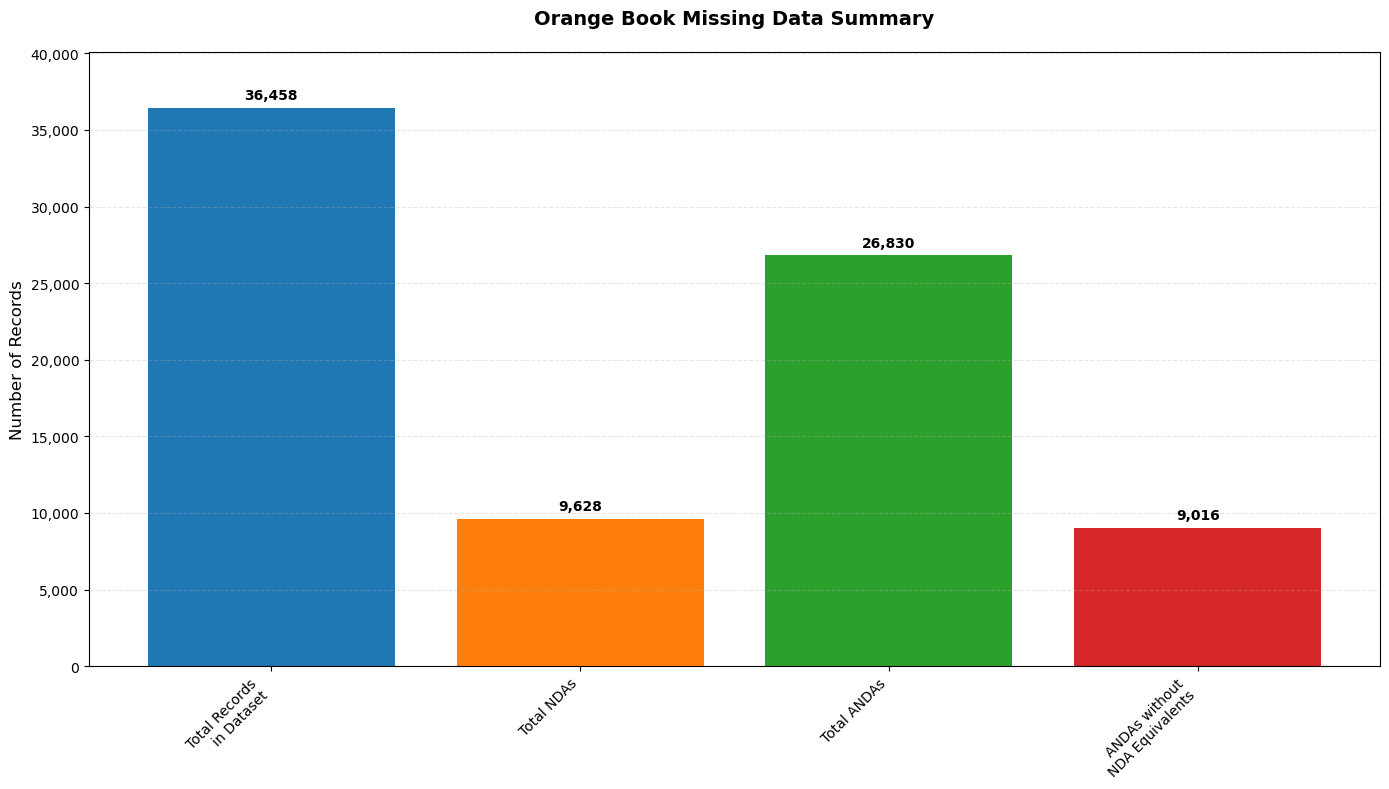

Orange Book Analysis Summary:
Total Records in Dataset: 36,458
Total NDAs: 9,628
Total ANDAs: 26,830
ANDAs without NDA Equivalents: 9,016


In [47]:
import matplotlib.pyplot as plt
import numpy as np

# Data from your analysis
categories = [
    'Total Records\nin Dataset',
    'Total NDAs',
    'Total ANDAs', 
    'ANDAs without\nNDA Equivalents',
]

# Values from your analysis
values = [
    len(ob),  # Total records
    len(ob[ob['Appl_Type'] == 'N']),  # Total NDAs
    len(ob[ob['Appl_Type'] == 'A']),  # Total ANDAs
    len(andas_without_nda),  # ANDAs without NDA equivalents
]

# Create the bar graph
fig, ax = plt.subplots(figsize=(14, 8))
bars = ax.bar(categories, values, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f'])

# Customize the plot
ax.set_ylabel('Number of Records', fontsize=12)
ax.set_title('Orange Book Missing Data Summary', fontsize=14, fontweight='bold', pad=20)

# Add value labels on top of bars
for bar, value in zip(bars, values):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + max(values)*0.01,
            f'{value:,}', ha='center', va='bottom', fontweight='bold')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add grid for better readability
ax.grid(axis='y', alpha=0.3, linestyle='--')

# Set y-axis to start from 0 and add some padding at the top
ax.set_ylim(0, max(values) * 1.1)

# Format y-axis with comma separators
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{int(x):,}'))

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Display the plot
plt.show()

# Print summary statistics
print("Orange Book Analysis Summary:")
print("=" * 40)
for category, value in zip(categories, values):
    print(f"{category.replace(chr(10), ' ')}: {value:,}")

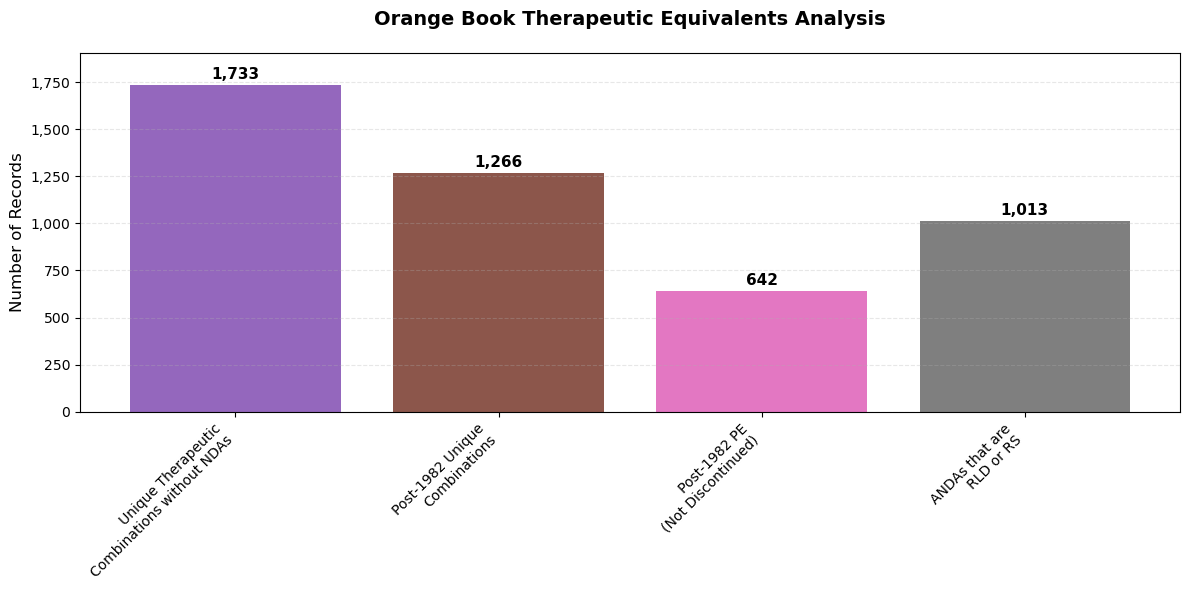

Focused Analysis Summary:
Unique Therapeutic Combinations without NDAs: 1,733
Post-1982 Unique Combinations: 1,266
Post-1982 PE (Not Discontinued): 642
ANDAs that are RLD or RS: 1,013


In [45]:
focused_categories = [
    'Unique Therapeutic\nCombinations without NDAs',
    'Post-1982 Unique\nCombinations',
    'Post-1982 PE\n(Not Discontinued)',
    'ANDAs that are\nRLD or RS'
]

# Values for these specific categories
focused_values = [
    len(unique_therapeutic_equivalents),  
    len(unique_therapeutic_equivalents_post_1982), 
    len(unique_therapeutic_equivalents_post_1982[unique_therapeutic_equivalents_post_1982["Type"] != "DISCN"]),  # Active post-1982 (642)
    1013  
]

# Create the focused bar graph
fig, ax = plt.subplots(figsize=(12, 6))
bars = ax.bar(focused_categories, focused_values, color=['#9467bd', '#8c564b', '#e377c2', '#7f7f7f'])

# Customize the plot
ax.set_ylabel('Number of Records', fontsize=12)
ax.set_title('Orange Book Therapeutic Equivalents Analysis', fontsize=14, fontweight='bold', pad=20)

# Add value labels on top of bars
for bar, value in zip(bars, focused_values):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + max(focused_values)*0.01,
            f'{value:,}', ha='center', va='bottom', fontweight='bold', fontsize=11)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add grid for better readability
ax.grid(axis='y', alpha=0.3, linestyle='--')

# Set y-axis to start from 0 and add some padding at the top
ax.set_ylim(0, max(focused_values) * 1.1)

# Format y-axis with comma separators
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{int(x):,}'))

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Display the plot
plt.show()

# Print summary for these 4 categories
print("Focused Analysis Summary:")
print("=" * 40)
for category, value in zip(focused_categories, focused_values):
    print(f"{category.replace(chr(10), ' ')}: {value:,}")

# Company Validation Analysis

Now let's test our new company validation system using real PDF extraction from ANDA approval letters. This will show how the system validates NDA-ANDA matches by cross-referencing company information.

In [ ]:
# Import our company validation system
import sys
sys.path.append(r'C:\Users\Grove\OneDrive\Documents\PYTHON\Datasets\EDA Feldman')

from extract_from_pdf import FDAApprovalLetterExtractor
from postprocess import get_nda_companies_from_main_table, calculate_text_similarity
from preprocess import preprocess_data

# Initialize the PDF extractor
extractor = FDAApprovalLetterExtractor()

print("Company Validation System loaded successfully!")

In [ ]:
# Test extraction from actual PDFs for the ANDAs you mentioned
test_andas = [
    {'anda': 'ANDA 077780', 'url': 'https://www.accessdata.fda.gov/drugsatfda_docs/appletter/2019/077780Orig1s000ltr.pdf', 'expected': 'GLAXOSMITHKLINE'},
    {'anda': 'ANDA 076470', 'url': 'https://www.accessdata.fda.gov/drugsatfda_docs/appletter/2017/076470Orig1s000ltr.pdf', 'expected': 'Aventis Pharmaceutical products'},
    {'anda': 'ANDA 088888', 'url': None, 'expected': 'No valid PDF'}  # This one should fail
]

print("Testing actual PDF extraction for the corrected ANDAs...")
print("=" * 60)

for test_case in test_andas:
    anda = test_case['anda']
    url = test_case['url']
    expected = test_case['expected']
    
    print(f"\n🔍 Testing {anda}")
    print(f"Expected: {expected}")
    
    if url is None:
        print("❌ No URL provided - this should fail as expected")
        continue
    
    try:
        # Extract data from the actual PDF
        result = extractor.extract_from_pdf(url)
        
        if result:
            extracted_company = result.get('reference_company', 'Not found')
            print(f"✅ PDF extraction successful")
            print(f"Extracted company: {extracted_company}")
            
            # Check if extraction matches expectation
            if extracted_company and expected.upper() in extracted_company.upper():
                print(f"✅ MATCH: Extracted company contains expected text")
            elif extracted_company:
                print(f"⚠️  PARTIAL: Extracted '{extracted_company}' vs expected '{expected}'")
            else:
                print(f"❌ NO COMPANY: No company extracted from PDF")
        else:
            print(f"❌ PDF extraction failed")
            
    except Exception as e:
        print(f"❌ Error extracting from PDF: {str(e)}")
    
    print("-" * 40)

In [ ]:
# Now let's test our company validation system with the actual extracted companies
print("\n" + "=" * 60)
print("TESTING COMPANY VALIDATION SYSTEM")
print("=" * 60)

# Load the main table to get NDA companies
try:
    main_table_path = r'C:\Users\Grove\OneDrive\Documents\PYTHON\Datasets\EDA Feldman\Copy of Main Table - Dosage Strength.xlsx'
    nda_companies = get_nda_companies_from_main_table(main_table_path)
    print(f"✅ Loaded {len(nda_companies)} NDA companies from main table")
except Exception as e:
    print(f"❌ Error loading main table: {e}")
    nda_companies = {}

# Test cases with actual extracted companies vs NDA companies
validation_tests = [
    {
        'anda': 'ANDA 077780',
        'extracted': 'GLAXOSMITHKLINE',  # This is what you said should be extracted
        'nda': 'N021868',  # Example NDA for testing
        'description': 'Should validate as GlaxoSmithKline match'
    },
    {
        'anda': 'ANDA 076470', 
        'extracted': 'Aventis Pharmaceutical products',  # This is what you said should be extracted
        'nda': 'N021868',  # Example NDA for testing
        'description': 'Should show Aventis vs NDA company comparison'
    }
]

for test in validation_tests:
    print(f"\n🧪 Testing: {test['anda']}")
    print(f"Description: {test['description']}")
    print(f"Extracted company: {test['extracted']}")
    
    # Get the NDA company for comparison
    if test['nda'] in nda_companies:
        nda_company = nda_companies[test['nda']]
        print(f"NDA company: {nda_company}")
        
        # Calculate similarity
        similarity = calculate_text_similarity(test['extracted'], nda_company)
        print(f"Similarity score: {similarity:.2%}")
        
        if similarity >= 0.9:
            print("✅ VALIDATION PASSED (>90% similarity)")
        elif similarity >= 0.7:
            print("⚠️  PARTIAL MATCH (70-90% similarity)")
        else:
            print("❌ VALIDATION FAILED (<70% similarity)")
    else:
        print(f"❌ NDA {test['nda']} not found in main table")
    
    print("-" * 40)